In [1]:
import datajoint as dj

In [2]:
schema = dj.Schema('student')

[2023-10-02 01:18:52,954][INFO]: Connecting root@fakeservices.datajoint.io:3306
[2023-10-02 01:18:52,962][INFO]: Connected root@fakeservices.datajoint.io:3306


In [3]:
@schema
class Student(dj.Manual):
    definition = """
stud_id    : int unsigned
---
first_name : varchar(40)
last_name  : varchar(40)

"""

In [4]:
Student.insert1((1, "Jane", "Doe"))


In [ ]:
Student.insert1((2, "Kudos", "Ani"))


In [11]:

Student.insert1((4, "James", "Don"))
Student.insert1((5, "Toby", "Daniel"))


In [12]:
Student()

stud_id,first_name,last_name
1,Jane,Doe
2,Jane,Doel
3,Kudos,Ani
4,James,Don
5,Toby,Daniel


In [13]:
@schema
class Assignment(dj.Lookup):
    definition = """
assign_number: char(8)
---
assign_name : varchar(100)
-> Student

"""
contents = (
        ("Assign-1", "creating SQL tables and inserting date"),
        ("Assign-2", "Relational database theory"),
        ("Assign-3", "Data models")
 )

In [15]:
data_insert = [
    (('Assign-1', 'creating SQL tables and inserting date', 1)),
    (('Assign-3', '"Relational database theory', 4)),
    (('Assign-2', 'Data models', 5))
     
    ]
Assignment.insert(data_insert)

In [16]:
Assignment()

assign_number,assign_name,stud_id
Assign-1,creating SQL tables and inserting date,1
Assign-2,Data models,5
Assign-3,"""Relational database theory",4


In [17]:
Student*Assignment

stud_id,assign_number,first_name,last_name,assign_name
1,Assign-1,Jane,Doe,creating SQL tables and inserting date
5,Assign-2,Toby,Daniel,Data models
4,Assign-3,James,Don,"""Relational database theory"


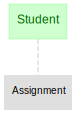

In [18]:
dj.Diagram(schema)

In [24]:
@schema
class Grade(dj.Manual):
    definition = """
    -> Student
    -> Assignment 
    ---
    grade : decimal(5,2)
"""


In [20]:
Grade

<bound method Table.drop of *stud_id    *grade_id    grade     assign_number 
+---------+ +----------+ +-------+ +------------+

 (Total: 0)
>

In [26]:
data_insert = [
    ((1,'Assign-1', 98.5)),
    ((4,'Assign-3', 78.9 )),
    ((5,'Assign-2', 99.5))
     
    ]
Grade.insert(data_insert)

In [28]:
Student*Assignment*Grade

stud_id,assign_number,first_name,last_name,assign_name,grade
1,Assign-1,Jane,Doe,creating SQL tables and inserting date,98.50
4,Assign-3,James,Don,"""Relational database theory",78.90
5,Assign-2,Toby,Daniel,Data models,99.50


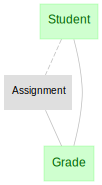

In [29]:
dj.Diagram(schema)